# Prediction of motor failure based on sensor readings.
### Task:  
- Predict motor failure on the next cycle or propose an alternative formulation of the problem of predicting it and provide solution.  
- It is given that the maximum cycle of the motor is the last cycle before the breakdown.  
- It is necessary to offer options for using the resulting model in practice.  

### Description of the [data](https://github.com/aziart/motor-breakdown-prediction/blob/main/data.csv):  
- __id__: id of the motor
- __cycle__: work cycle
- __p00-p20__: sensor readings read during operation
- __s0, s1__: settings changed at the end of each cycle  

## Libraries + Preliminary Data Overview
In this section, we import the libraries that I will work with throughout the process. Previously, we want to understand what data we are working with, understand the quality of the data (the presence of missing and categorical variables), see how the variables correlate with each other, visualize for the overall picture, and see the basic statistical metrics for variables

### Libraries

In [67]:
# import libraries (+settings) to view the data
import pandas as pd
pd.set_option('display.max_columns', 30)
import numpy as np
import matplotlib.pyplot as plt

# import Machine Learning libraries (+metrics and split method)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

### Data Overview

In [68]:
# pulled the data into the specified variable
source = "data.csv"
all_data = pd.read_csv(source, sep = ',')

In [69]:
# data
all_data.head()

,id,cycle,p00,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,s1,s2
0,1,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,641.82,39.06,23.4190,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004
1,1,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,642.15,39.00,23.4236,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003
2,1,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,642.35,38.95,23.3442,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003
3,1,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,642.35,38.88,23.3739,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000
4,1,5,518.67,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,642.37,38.90,23.4044,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002


In [70]:
# check what data we are working with.
# it is fundamentally important at the beginning of the task to understand whether there are categorical data or missing values

print("Number of NaN\'s is {}".format(all_data.isnull().sum().sum()))
print("The data types are as following: \n{}".format(all_data.dtypes))

Number of NaN's is 0
The data types are as following: 
id         int64
cycle      int64
p00      float64
p01      float64
p02      float64
p03      float64
p04      float64
p05      float64
p06      float64
p07      float64
p08        int64
p09        int64
p10        int64
p11      float64
p12      float64
p13      float64
p14      float64
p15      float64
p16      float64
p17      float64
p18      float64
p19      float64
p20      float64
s1       float64
s2       float64
dtype: object


As we can observe, all features are numerical. This simplifies things a lot.

In [71]:
# feature statistics
description = all_data.describe()
print(description.round(4))

               id       cycle       p00      p01         p02         p03  \
count  16138.0000  16138.0000  16138.00  16138.0  16138.0000  16138.0000   
mean      40.7079    105.5481    518.67      1.3     47.5443    521.4054   
std       23.3954     65.9153      0.00      0.0      0.2674      0.7383   
min        1.0000      1.0000    518.67      1.3     46.8600    518.6900   
25%       20.0000     51.0000    518.67      1.3     47.3500    520.9400   
50%       42.0000    101.0000    518.67      1.3     47.5200    521.4600   
75%       61.0000    153.0000    518.67      1.3     47.7100    521.9400   
max       80.0000    362.0000    518.67      1.3     48.5300    523.3800   

              p04         p05         p06       p07         p08      p09  \
count  16138.0000  16138.0000  16138.0000  16138.00  16138.0000  16138.0   
mean    2388.0967   8143.9335      8.4426      0.03    393.2271   2388.0   
std        0.0726     19.7313      0.0375      0.00      1.5490      0.0   
min     238

In [72]:
# correlation matrices
correlation_matrix = all_data.corr().round(2)
print(correlation_matrix[correlation_matrix>0.7])
print(correlation_matrix[correlation_matrix>0.5])

        id  cycle  p00  p01   p02   p03   p04   p05   p06  p07   p08  p09  \
id     1.0    NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN   
cycle  NaN    1.0  NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN   
p00    NaN    NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN   
p01    NaN    NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN   
p02    NaN    NaN  NaN  NaN  1.00   NaN  0.78   NaN  0.78  NaN  0.72  NaN   
p03    NaN    NaN  NaN  NaN   NaN  1.00   NaN   NaN   NaN  NaN   NaN  NaN   
p04    NaN    NaN  NaN  NaN  0.78   NaN  1.00   NaN   NaN  NaN   NaN  NaN   
p05    NaN    NaN  NaN  NaN   NaN   NaN   NaN  1.00   NaN  NaN   NaN  NaN   
p06    NaN    NaN  NaN  NaN  0.78   NaN   NaN   NaN  1.00  NaN   NaN  NaN   
p07    NaN    NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN   
p08    NaN    NaN  NaN  NaN  0.72   NaN   NaN   NaN   NaN  NaN  1.00  NaN   
p09    NaN    NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN  NaN   

In [73]:
# create dataframe with last cycle indices
selected_idx = all_data.groupby("id").apply(lambda all_data: all_data['cycle'].idxmax())
selected_rows = all_data.loc[selected_idx, :]
last_cycles = selected_rows[['id', 'cycle']]
last_cycles

,id,cycle
191,1,192
478,2,287
657,3,179
846,4,189
1115,5,269
...,...,...
15368,76,210
15522,77,154
15753,78,231
15952,79,199


The minimum number of cycle, after which motor has broken:
128
Some statistics on cycles after motor breaks:
count     80.000000
mean     201.725000
std       41.353057
min      128.000000
25%      173.500000
50%      195.500000
75%      215.250000
max      362.000000
Name: cycle, dtype: float64


(0.0, 30.0)

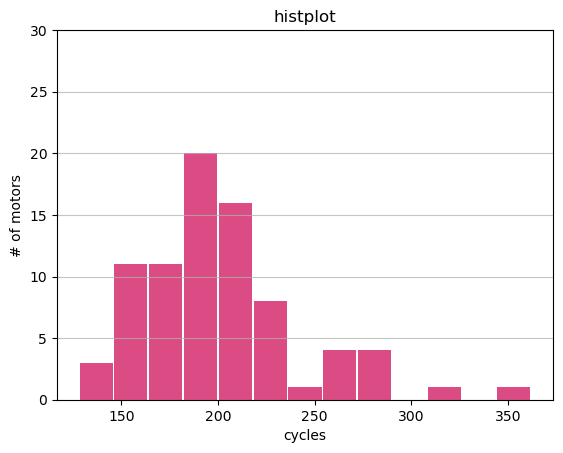

In [74]:
min_cycle = last_cycles['cycle'].min()
print("The minimum number of cycle, after which motor has broken:\n{}".format(min_cycle))
print("Some statistics on cycles after motor breaks:\n{}".format(last_cycles['cycle'].describe()))


# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=last_cycles['cycle'], bins='auto', color='#cc0052',
                            alpha=0.7, rwidth=0.95)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('cycles')
plt.ylabel('# of motors')
plt.title('histplot')
maxfreq = n.max()
plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### First insights

- The absolute correlation of some variables immediately catches the eye. The standard deviation for each of these columns is zero. Obviously, variables with the same value for every observation and most probably useless
- There are also variables that correlate not absolutely, but nevertheless strongly. We should reduce the number of variables to a minimum, but at the same time not lose those that can strengthen our machine learning model
- Most of all, we were interested in how the settings correlate with the rest of the variables. This did not give anything that could be useful in solving the problem

#### What about cycles

This exercise have been done in order to think about the target event during the search for a solution
- According to life-cycle of given 80 motors, the minimum breakage cycle is 128th
- According to the right-skewed distribution (on histogram), we see, on average, by the 200th cycle, the motors break down.  

It is difficult to draw any unusual conclusions, except that it is obvious that motors have the property of depreciation as they are used.


### Visualization

- In this section we visualize some the variables together (all motors in one diagram in order to see if there's any common pattern visually).
Most of them are removed from the final version so as not to interfere.

__Example of "bad" (useless) feature__

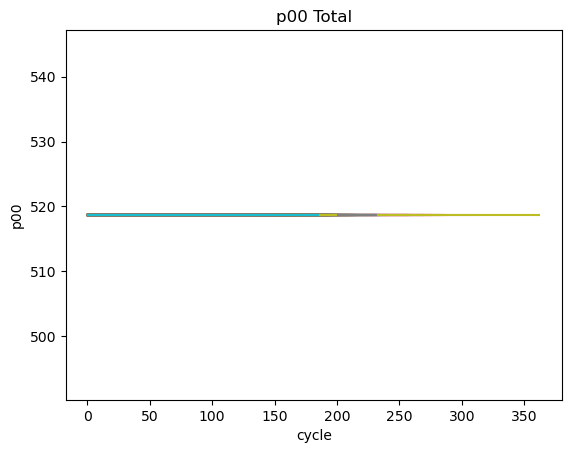

In [75]:
# p00 values for each cycle
for i in range(1,all_data['id'].max() + 1):
    plt.plot(all_data[all_data['id']==i]['cycle'],all_data[all_data['id']==i]['p00'])
    plt.grid()
    plt.xlabel('cycle')
    plt.ylabel('p00')
    plt.title('p00 Total')
plt.show()

__Example of feature with strong shift__

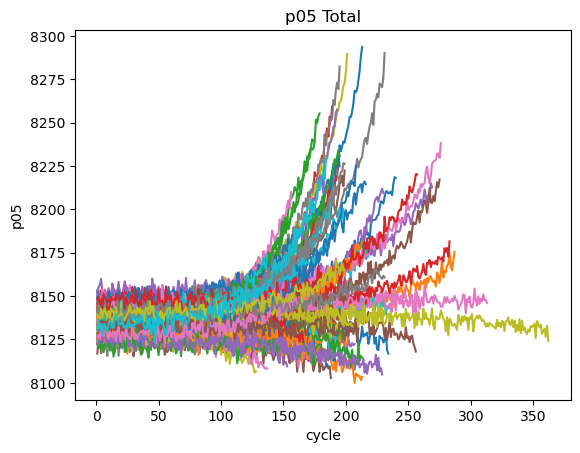

In [76]:
# p05 values for each cycle (all motors)
for i in range(1,all_data['id'].max() + 1):
    plt.plot(all_data[all_data['id']==i]['cycle'],all_data[all_data['id']==i]['p05'])
    plt.grid()
    plt.xlabel('cycle')
    plt.ylabel('p05')
    plt.title('p05 Total')
plt.show()

__Example of how "bad" visualization can be useful__

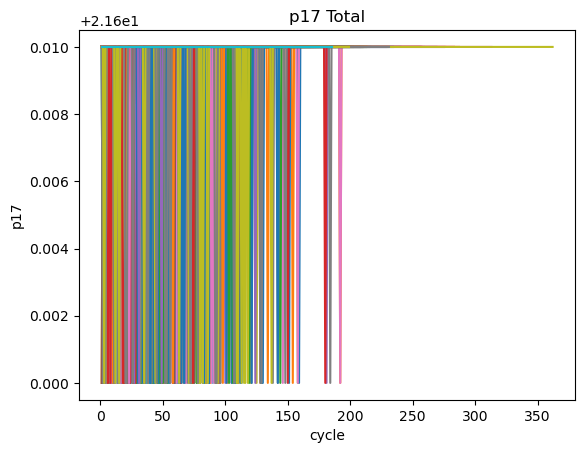

In [77]:
# p17 values for each cycle
for i in range(1,all_data['id'].max() + 1):
    plt.plot(all_data[all_data['id']==i]['cycle'],all_data[all_data['id']==i]['p17'])
    plt.grid()
    plt.xlabel('cycle')
    plt.ylabel('p17')
    plt.title('p17 Total')
plt.show()

At first it may seem that this "all-in-one" plot doesn't make sense, but as we can see, at some point of every motor lifecycle, value of indicated feature stops hitting zero-value. In future model training it could be helpful if we define different targets ("against each other") for different periods for each motor when creating TRAIN DATASET. For instance, almost last ten cycles for motor_1 can have target "1" and other ten cycles from period where feature still hits zero-value can have target "0". It may not be the best way of training model in such way in terms of "businessivity" and strength of model in correct classifying, but this feature is good example of predictors that may seem useless at first, but which still can have good potential in increasing number of approaches we can choose from.

#### Conclusion:
There are "good" features (after approximately half of motor life-time, most of them strongly tend (shift) to the values defined for each variable). But like "p00" there also are absolutely useless ones. So in order to have stable model, we need to drop them off.

### Actions and approach to solving the problem itself (building a model)

- Based on what has been done above, we remove unnecessary variables;
- Let's start with the simplest way of solving problem and check whether it is possible to predict breakage on the remaining variables on the next cycle by taking the penultimate cycle as target = 0, and the last target = 1 - if this does not give us anything, then we will build a model on time series

In [78]:
all_data

,id,cycle,p00,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,s1,s2
0,1,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,641.82,39.06,23.4190,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004
1,1,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,642.15,39.00,23.4236,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003
2,1,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,642.35,38.95,23.3442,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003
3,1,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,642.35,38.88,23.3739,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000
4,1,5,518.67,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,642.37,38.90,23.4044,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16133,80,181,518.67,1.3,48.17,520.44,2388.17,8218.63,8.5194,0.03,397,2388,100,644.00,38.39,23.1678,1604.26,1428.92,14.62,21.61,552.24,2388.20,9145.62,0.0042,0.0002
16134,80,182,518.67,1.3,48.41,520.06,2388.12,8221.91,8.5493,0.03,396,2388,100,643.81,38.34,23.0142,1598.32,1426.31,14.62,21.61,551.60,2388.16,9160.23,-0.0014,0.0004
16135,80,183,518.67,1.3,48.04,519.67,2388.21,8217.46,8.5106,0.03,397,2388,100,643.49,38.34,22.9337,1603.37,1434.30,14.62,21.61,551.78,2388.12,9152.84,0.0018,0.0000
16136,80,184,518.67,1.3,48.04,519.72,2388.20,8228.65,8.4983,0.03,397,2388,100,643.83,38.53,22.9971,1603.01,1430.23,14.62,21.61,551.78,2388.17,9164.10,-0.0024,0.0002


In [79]:
# drop unnecessary features
all_data = all_data.drop(["p00", "p01", "p07", "p09", "p10", "p16"], axis=1)

In [80]:
# dataset after dropping unnecessary features
all_data

,id,cycle,p02,p03,p04,p05,p06,p08,p11,p12,p13,p14,p15,p17,p18,p19,p20,s1,s2
0,1,1,47.47,521.66,2388.02,8138.62,8.4195,392,641.82,39.06,23.4190,1589.70,1400.60,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004
1,1,2,47.49,522.28,2388.07,8131.49,8.4318,392,642.15,39.00,23.4236,1591.82,1403.14,21.61,553.75,2388.04,9044.07,0.0019,-0.0003
2,1,3,47.27,522.42,2388.03,8133.23,8.4178,390,642.35,38.95,23.3442,1587.99,1404.20,21.61,554.26,2388.08,9052.94,-0.0043,0.0003
3,1,4,47.13,522.86,2388.08,8133.83,8.3682,392,642.35,38.88,23.3739,1582.79,1401.87,21.61,554.45,2388.11,9049.48,0.0007,0.0000
4,1,5,47.28,522.19,2388.04,8133.80,8.4294,393,642.37,38.90,23.4044,1582.85,1406.22,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16133,80,181,48.17,520.44,2388.17,8218.63,8.5194,397,644.00,38.39,23.1678,1604.26,1428.92,21.61,552.24,2388.20,9145.62,0.0042,0.0002
16134,80,182,48.41,520.06,2388.12,8221.91,8.5493,396,643.81,38.34,23.0142,1598.32,1426.31,21.61,551.60,2388.16,9160.23,-0.0014,0.0004
16135,80,183,48.04,519.67,2388.21,8217.46,8.5106,397,643.49,38.34,22.9337,1603.37,1434.30,21.61,551.78,2388.12,9152.84,0.0018,0.0000
16136,80,184,48.04,519.72,2388.20,8228.65,8.4983,397,643.83,38.53,22.9971,1603.01,1430.23,21.61,551.78,2388.17,9164.10,-0.0024,0.0002


### Creating a list with motors and their cycles

- let's exclude the id of the motors while creating list of arrays(cycles of each motor) - they will already be splitted in the list

In [81]:
# creating list of arrays(cycles of each motor)
prev_item = None
collection = []

motor = []

for item in all_data.values:
    if prev_item is not None:
        motor.append(prev_item)
    
    if item[1] == 1 and prev_item is not None:
        collection.append(np.array(motor)[:,1:])
        motor = []
    prev_item = item
    
motor.append(prev_item)
collection.append(np.array(motor)[:,1:])

In [82]:
print(collection[0][0])         # 1st engine first cycle
print(collection[79][184])      # 79th engine last cycle

[ 1.00000e+00  4.74700e+01  5.21660e+02  2.38802e+03  8.13862e+03
  8.41950e+00  3.92000e+02  6.41820e+02  3.90600e+01  2.34190e+01
  1.58970e+03  1.40060e+03  2.16100e+01  5.54360e+02  2.38806e+03
  9.04619e+03 -7.00000e-04 -4.00000e-04]
[1.85000e+02 4.80500e+01 5.20000e+02 2.38818e+03 8.22973e+03 8.52500e+00
 3.97000e+02 6.43880e+02 3.83500e+01 2.30323e+01 1.60638e+03 1.42141e+03
 2.16100e+01 5.51550e+02 2.38822e+03 9.17057e+03 1.50000e-03 0.00000e+00]


In [83]:
print(all_data.values[200])     # 200th row of dataframe

[ 2.00000e+00  9.00000e+00  4.71400e+01  5.22400e+02  2.38798e+03
  8.14529e+03  8.38680e+00  3.90000e+02  6.41980e+02  3.90600e+01
  2.34875e+01  1.58199e+03  1.39501e+03  2.16000e+01  5.54690e+02
  2.38802e+03  9.05167e+03  1.70000e-03 -4.00000e-04]


In [84]:
length_of_collection = len(collection)                                      # number of motors in collection
print("{} is a number of motors in list".format(length_of_collection))      # number of motors in collection
print("The shape of motor 1 is {}".format(collection[0].shape))             # motor 1: number of cycles (and number of features)
print("The shape of motor 2 is {}".format(collection[1].shape))             # motor 2: number of cycles (and number of features)

80 is a number of motors in list
The shape of motor 1 is (192, 18)
The shape of motor 2 is (287, 18)


__The next step is to check whether any one feature can predict a breakdown well. We will take penultimate cycle and the one before it and define targets for those observations as 1 and 0, respectively. We can use decision tree for this one:__

In [88]:
for i in range(18):
    X = []
    Y = []
    for motor in collection:
        X.append([motor[-1][i]])
        X.append([motor[-2][i]])
        Y.append(1)
        Y.append(0)
    X = np.array(X)

    a = []
    for _ in range(100):
        clf = DecisionTreeClassifier(random_state=0)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
        clf.fit(X_train, Y_train)
        a.append(accuracy_score(clf.predict(X_test), Y_test))
    print("{} feature predicting accuracy is {}".format(i, np.mean(a).round(2)))

0 feature predicting accuracy is 0.49
1 feature predicting accuracy is 0.4
2 feature predicting accuracy is 0.5
3 feature predicting accuracy is 0.5
4 feature predicting accuracy is 0.38
5 feature predicting accuracy is 0.49
6 feature predicting accuracy is 0.49
7 feature predicting accuracy is 0.47
8 feature predicting accuracy is 0.55
9 feature predicting accuracy is 0.51
10 feature predicting accuracy is 0.42
11 feature predicting accuracy is 0.46
12 feature predicting accuracy is 0.41
13 feature predicting accuracy is 0.46
14 feature predicting accuracy is 0.46
15 feature predicting accuracy is 0.44
16 feature predicting accuracy is 0.5
17 feature predicting accuracy is 0.58


__Let's check whether it is possible to predict breakdown using only penultimate cycle and the one before it. We will use decision tree again to check if there's huge difference in those last cycles of motors__

In [89]:
# Creating arrays with the penultimate cycle and the one before it for each motor
X = []
Y = []
for motor in collection:
    X.append(motor[-1])
    X.append(motor[-2])
    Y.append(1)
    Y.append(0)
X = np.array(X)

# shape of created matrix (dataframe)
print(X.shape)

# fit the model
clf = DecisionTreeClassifier(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
clf.fit(X_train, Y_train)

# check accuracy
temp = 0
for xx, yy in zip(clf.predict(X_test), Y_test):
    if xx==yy:
        temp += 1
    else:
        continue
print("Accuracy score is: {}".format(temp/16))
del temp

# or use library metric
# print("Accuracy score is: {}".format(accuracy_score(clf.predict(X_test), Y_test)))

(160, 18)
Accuracy score is: 0.5


__This did not give us any satisfying results, as it would in iris classification problem, for instance. The exercise was done for the reason that the task itself required to predict motor failure on next cycle and the only possible way to do this was to take the last (-1) cycles and try to contrast them with different target events. So, let's try to find alternative approach to solve the problem.__

__As we know from what we've done so far, the minimum breakdown cycle is 128th, so we can try training model taking 127th cycle with 0 target for each motor and penultimate cycle with target=1.__

In [91]:
# dataset
X = []
Y = []
for motor in collection:
    X.append(motor[-2])
    X.append(motor[127])
    Y.append(1)
    Y.append(0)
X = np.array(X)

# split: train/validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

a = []

# average accuracy
for _ in range(1000):
    clf = DecisionTreeClassifier(random_state=0)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
    clf.fit(X_train, Y_train)
    a.append(accuracy_score(clf.predict(X_test), Y_test))
print("Accuracy is %{}".format(100 * np.mean(a)))

Accuracy is %98.52499999999999


__It may seem that we can stop here, but the thing is that this model is most likely too skewed. We compare two types of cycles which were taken from too different periods of motor life-time, which means that, if we use this model in production, it will give us lots of true-positives. This will force us to replace motors long before they become unusable. If our task is to diagnose motors in advance and keep them in excellent condition, then this solution will suit us, but if the motors cannot be used in production after repair, then our task is to predict a breakdown much closer to it. Otherwise, whole process will become too expensive.__